# PyOAE - Example calculation of the biological and atmospheric components of non-thermal pCO2

by Greg Pelletier, 10-Apr-2025

Variations in temperature can have a significant effect on pCO2 in seawater (Sarmiento and Gruber, 2006). Therefore, methods have been developed to separate the thermal and non-thermal components of the observed pCO2 (e.g. Takahashi et al 2002; Fassbender et al 2022).

In this notebook, we present a method to separate the non-thermal component of the pCO2 into separate atmospheric and biogeochemical/physical components. We will refer to the biogeoechemical/physical component as "biological" for simplicity. 

## Fassbender's method of estimating non-thermal and thermal components of pCO2

In this workbook we use the function "pco2_fass" to apply Fassbender's method (Rodgers et al, 2022) to estimate the thermal and non-thermal components of pCO2. The first step of Fassbender's method is to calculate the long-term average pCO2 (pCO2_AM) using a carbonate system calculator (e.g. PyCO2SYS) using inputs of the long-term averages of alkalinity (TA_mean), dissolved inorganic carbon (DIC_mean), total silicate (SIO4_mean), total phosphate (PO4_mean), temperature (temp_mean), and salinity (sal_mean), as follows:

pCO2_mean = f(temp_mean, sal_mean, TA_mean, DIC_mean, SIO4_mean, PO4_mean)   (eqn 1)

where "f" is the carbonate system calculation function (e.g. PyCO2SYS).

The thermally-driven component of pCO2 (pCO2_T) is calculated using the time-varying temperature observations (temp_obs), combined with the long-term averages of the other inputs to PyCO2SYS as follows:

pCO2_T = f(temp_obs, sal_mean, TA_mean, DIC_mean, SIO4_mean, PO4_mean)   (eqn 2)

The thermal pCO2 component seasonal cycle anomaly (pCO2_Tanom) is estimated from the following equation (same as eqn 4 above):

pCO2_Tanom = pCO2_T - pCO2_mean     (eqn 3)

Finally, the non-thermal component of pCO2 (pCO2_NT) is estimated with the following equation:

pCO2_NT = pCO2_obs - pCO2_Tanom     (eqn 4)

The non-thermal component of pCO2 (pCO2_NT) includes the combined effects of biogeochemical, physical, and atmospheric effects. 

## Biological and atmospheric components of pCO2

The non-thermal component of the pCO2 of a given water mass is affected by air–sea gas exchange, and biogeochemical/physical processes, such as production/consumption of organic matter and mixing (analogous to the processes affecting the "biological" component of DIC described by Clargo et al 2015 and Burt et al, 2016). To isolate the biological (biogeochemical/physical) component of pCO2 (pCO2_bio), the atmospheric pCO2 (pCO2_atm) is removed from the non-thermal component of pCO2 (pCO2_NT) as follows: 

pCO2_bio = pCO2_NT – pCO2_atm				(eqn 5)

where 

- pCO2_NT = non-thermal component of pCO2 (OceanSODA-ETHZ using Takahishi's or Fassbender's method)
- pCO2_atm = atmospheric pCO2 (SeaFlux)

In this notebook, we use the pCO2_NT calculated using either the method of Takahashi et al (2002) or Rodgers et al (2022), using 1982-2022 monthly observed surface ocean carbonate system variables and temperatures in the OceanSODA-ETHZ data set in each month at each grid cell. We use the monthly atmospheric "pCO2_atm" from the SeaFlux data set in each grid cell for each month from 1982-2020. Finally, we calculated the 1982-2020 monthly values of "pCO2_bio" using eqn 5.

## Spatial structure and seasonal variation of pCO2_bio

The following two approaches were used to analyze the spatial structure and seasonal variation of pCO2_bio:

1) Seasonal ranges of pCO2_bio estimated from long-term averages of differences between annual maxima and minima
2) Sine-regression of the repeating annual cycle of seasonal changes in pCO2_bio

#### **Seasonal range of pCO2_bio from difference between annual maxima and minima**

The minmum and maximum values of pCO2_bio in each grid cell were determined for each calendar year from 1982-2022. The seasonal range of pCO2_bio in each year was then estimated as the difference between the maximum and minimum values. The mean and standard deviation of the seasonal ranges across all years was then determined for each grid cell to represent the long-term average and interannual variability of the spatial structure of seasonal amplitude of pCO2_bio. 

#### **Sine regression of pCO2_bio**

The repeating annual cycle of pCO2_bio can be represented as a sine function of the following form applied to each grid cell:

y = mean + amplitude * sin(2π * (x - phase) / period)	(eqn 6)

where 

- y = pCO2_bio = pCO2_NT – pCO2_atm (monthly values from 1982-2022 in each grid cell)
- x = time as decimal year fraction (1982-2022) 
- mean = mean parameter from sine-regression
- amplitude = amplitude from sine-regression (half of the seasonal range between annual maxima and minima)
- phase = phase shift from sine-regression
- period = assumed equal to 1 cycle per year

## OceanSODA-ETHZ and SeaFlux data used in this notebook

In this example we use two netcdf files that we need to do the analysis, OceanSODA_ETHZ_for_PyOAE.nc and SeaFlux_for_PyOAE.nc, available to download at the following link:

https://drive.google.com/drive/folders/1BGgVRk2Gf6mxNnX1Fxg0Q4GtZSAYMzef?usp=sharing

## PyOAE functons pco2_tnorm, pco2_fass, sine_fit, and fCO2_to_pCO2

PyOAE includes functions to calculate thermal and non-thermal components of pCO2 using Takahashi's method (function pco2_tnorm), and using Fassbender's method (function pco2_fass), and also a function to convert atmospheric fCO2 to pCO2. 

## References

- Takahasi et al 2002 (http://dx.doi.org/10.1016/S0967-0645(02)00003-6)
- Rodgers et al 2022 (https://doi.org/10.1029/2023GB007798)
- Clargo et al 2015 (https://doi.org/10.1016/j.marchem.2015.08.010)
- Burt et al 2016 (https://doi.org/10.1002/lno.10243):


# Computations

**Install or upgrade PyOAE**

Run one of the next commands if needed to either install PyOAE for the first time, or upgrade PyOAE to the latest version

In [1]:
# # Run the following command to install PyOAE for the first time
# !pip install git+https://github.com/gjpelletier/PyOAE.git

# # Run the following command to upgrade PyOAE to the latest version
# !pip install git+https://github.com/gjpelletier/PyOAE.git --upgrade

**Import the packages that are needed and read the data that will be used in this example, and make a matlab-style timer to measure how long it takes to perform calculations**

In [2]:
from PyOAE import pco2_fass, pco2_tnorm, nnn, sine_fit, fCO2_to_pCO2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io
import multiprocessing
# import pandas as pd

**Read OceanSODA-ETHZ data**

In [3]:
# read netcdf file of OceanSODA-ETHZ data
ds1 = xr.open_dataset("OceanSODA_ETHZ_for_PyOAE.nc",chunks={"lon":60})
# Convert ds1 to dictionary of numpy arrays for computations
ds_dict = {var: ds1[var].values for var in ds1.data_vars}
# append yearfrac,lon,lat,time,pco2atm,fco2atm to ds_dict
ds_dict["yearfrac"] = ds1.yearfrac.values
ds_dict["x"] = ds1.x.values
ds_dict["y"] = ds1.y.values
ds_dict["time"] = ds1.time.values
# extract the dims
NT,NY,NX = ds_dict["talk"].shape
nyears = int(NT/12)

**Read SeaFlux data**

In [4]:
# read netcdf file of SeaFlux atmospheric pCO2
ds2 = xr.open_dataset("SeaFlux_for_PyOAE.nc",chunks={"lon":60})
ds_dict["pco2atm"] = ds2.pco2atm.values
ds_dict["fco2atm"] = ds2.fco2atm.values

**Define a matlab-style tic toc timer to measure how long the computations take**

In [5]:
# matlab-style tic toc timer
def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )
    return

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

# Fassbender's method of estimating pCO2_T, pCO2_NT, and pCO2_Tanom

**Transpose and combine x and y into 1d for multiprocessing**

In [6]:
# transpose and reshape arrays
ds_dict_T = {}
ds_dict_T["yearfrac"] = ds1.yearfrac.values
ds_dict_T["talk"] = np.transpose(ds_dict['talk'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["dic"] = np.transpose(ds_dict['dic'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["temperature"] = np.transpose(ds_dict['temperature'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["salinity"] = np.transpose(ds_dict['salinity'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["sio3"] = np.transpose(ds_dict['sio3'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["po4"] = np.transpose(ds_dict['po4'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["ph_total"] = np.transpose(ds_dict['ph_total'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["pco2atm"] = np.transpose(ds_dict['pco2atm'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["fco2atm"] = np.transpose(ds_dict['fco2atm'],(2,1,0)).reshape(NX*NY,NT)
# initialize new output arrays
ds_dict_T["pco2_obs"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["pco2_T"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["pco2_Tanom"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["pco2_NT"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["pco2_mean"] = np.full((NX*NY), np.nan)

**Define the function that will calculate pCO2_T, pCO2_NT, and pCO2_Tanom during the multiprocessing loop**

In [7]:
# define the function to find the root in each grid cell i
def find_fass(i):
    kwargs = {
        'alkalinity': ds_dict_T["talk"][i,:],
        'dic': ds_dict_T["dic"][i,:],
        'total_silicate': ds_dict_T["sio3"][i,:],
        'total_phosphate': ds_dict_T["po4"][i,:],
        'temperature': ds_dict_T["temperature"][i,:],
        'salinity': ds_dict_T["salinity"][i,:],
        'total_pressure': 0,
        'opt_pH_scale': 1,  # pH scale (1= total scale)
        'opt_k_carbonic': 10,  # Choice of H2CO3 and HCO3- K1 and K2 (10= Lueker et al 2000)
        'opt_k_bisulfate': 1,  # Choice of HSO4- dissociation constant KSO4 (1= Dickson)
        'opt_total_borate': 1,  # Choice for boron:sal 
        'opt_k_fluoride': 1   # Choice for fluoride
        }
    # nnn = number of non-nan values for each input variable to dic_bio         
    nnn_talk = np.count_nonzero(~np.isnan(kwargs["alkalinity"]))  # number of non-nan
    nnn_dic = np.count_nonzero(~np.isnan(kwargs["dic"]))  # number of non-nan
    nnn_sio3 = np.count_nonzero(~np.isnan(kwargs["total_silicate"]))  # number of non-nan
    nnn_po4 = np.count_nonzero(~np.isnan(kwargs["total_phosphate"]))  # number of non-nan
    nnn_temp = np.count_nonzero(~np.isnan(kwargs["temperature"]))  # number of non-nan
    nnn_sal = np.count_nonzero(~np.isnan(kwargs["salinity"]))  # number of non-nan
    if (nnn_talk==nnn_dic and nnn_talk==nnn_sio3 and 
        nnn_talk==nnn_po4 and nnn_talk==nnn_temp and nnn_talk==nnn_sal and nnn_talk > 0):
        # solve for dic_bio = dic_obs - dic_atm
        result = pco2_fass(**kwargs)
        output = {
            'i': i,
            'result': result
            }
        return output

**The next step uses multiprocessiong and takes about half an hour to loop through all grid cells to calculate the thermal and non-thermal components of pCO2 using Fassbender's method**

In [8]:
# parallel processing loop through all grid cells
print('Computing pCO2_T, pCO2_NT, and pCO2_Tanom, please wait ...')
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_fass, range(NX*NY))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result['i'])
            ds_dict_T["pco2_obs"][i,:]= result['result']["pCO2_obs"]
            ds_dict_T["pco2_mean"][i]= result['result']["pCO2_mean"]
            ds_dict_T["pco2_T"][i,:]= result['result']["pCO2_T"]
            ds_dict_T["pco2_Tanom"][i,:]= result['result']["pCO2_Tanom"]
            ds_dict_T["pco2_NT"][i,:]= result['result']["pCO2_NT"]
            # print("i in loop: ",i) 
print('Done')
toc()

Computing pCO2_T, pCO2_NT, and pCO2_Tanom, please wait ...
Done
Elapsed time: 1839.659313 seconds.



**Reshape and transpose outputs back to original shape of inputs**

In [9]:
ds_dict["pco2_obs"] = np.reshape(ds_dict_T['pco2_obs'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["pco2_T"] = np.reshape(ds_dict_T['pco2_T'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["pco2_Tanom"] = np.reshape(ds_dict_T['pco2_Tanom'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["pco2_NT"] = np.reshape(ds_dict_T['pco2_NT'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["pco2_mean"] = np.reshape(ds_dict_T['pco2_mean'],(NX,NY)).transpose(1,0)

**Convert atmospheric fCO2 from SeaFlux into atmospheric pCO2**

In [10]:
ds_dict['pco2_atm'] = fCO2_to_pCO2(ds_dict['fco2atm'],ds_dict['temperature'])

# reshape pCO2_atm for multiprocessing later
ds_dict_T["pco2_atm"] = np.transpose(ds_dict['pco2_atm'],(2,1,0)).reshape(NX*NY,NT)

# Estimating the biogeochemical/physical component of pCO2

Next, we estimate the biogeochemical/physical component of pCO2 using the the following equation:

pCO2_bio = pCO2_NT - pCO2_atm

In [11]:
# compute pCO2_bio
ds_dict['pco2_bio'] = ds_dict['pco2_NT'] - ds_dict["pco2_atm"]

# reshape pCO2_bio for multiprocessing later
ds_dict_T["pco2_bio"] = np.transpose(ds_dict['pco2_bio'],(2,1,0)).reshape(NX*NY,NT)

# Amplitude of pCO2_bio based on means of annual min/max 

In [12]:
# initialize arrays for annual stats
ds_dict_T["pco2_bio_annual_mean"] = np.full((NX*NY,nyears), np.nan)
ds_dict_T["pco2_bio_annual_min"] = np.full((NX*NY,nyears), np.nan)
ds_dict_T["pco2_bio_annual_max"] = np.full((NX*NY,nyears), np.nan)
ds_dict_T["pco2_bio_annual_range"] = np.full((NX*NY,nyears), np.nan)
ds_dict_T["pco2_bio_range_mean"] = np.full((NX*NY), np.nan)
ds_dict_T["pco2_bio_range_std"] = np.full((NX*NY), np.nan)

In [13]:
# define function to find annual stats for pCO2_bio range = annual max - annual min
def find_annual_pco2_bio_stats(i):
    import pandas as pd
    import warnings
    warnings.filterwarnings('ignore')
    data = {
        'date': ds_dict['time'],
        'value': ds_dict_T["pco2_bio"][i,:]
        }
    if (nnn(data["value"]) == NT):
        # Create DataFrame
        df = pd.DataFrame(data)
        # Ensure 'date' column is of datetime type
        df['date'] = pd.to_datetime(df['date'])
        # Set 'date' as the index
        df.set_index('date', inplace=True)
        # Resample data by year and calculate mean, min, and max
        annual_stats = df.resample('Y').agg(['mean', 'min', 'max'])
        # Rename columns for clarity
        annual_stats.columns = ['Mean', 'Min', 'Max']
        annual_stats['Range'] = (annual_stats['Max'] - annual_stats['Min'])
        range_mean = np.mean(annual_stats['Range'])
        range_std = np.std(annual_stats['Range'])
        output = {
            'i': i,
            'annual_stats': annual_stats,
            'range_mean': range_mean,
            'range_std': range_std
            }
        return output

In [14]:
# parallel processing loop through all grid cells
print('Computing annual stats for pCO2_bio, please wait ...')
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_annual_pco2_bio_stats, range(NX*NY))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result['i'])
            ds_dict_T["pco2_bio_annual_mean"][i,:]= result['annual_stats']["Mean"]
            ds_dict_T["pco2_bio_annual_min"][i]= result['annual_stats']["Min"]
            ds_dict_T["pco2_bio_annual_max"][i,:]= result['annual_stats']["Max"]
            ds_dict_T["pco2_bio_annual_range"][i,:]= result['annual_stats']["Range"]
            ds_dict_T["pco2_bio_range_mean"][i]= result['range_mean']
            ds_dict_T["pco2_bio_range_std"][i]= result['range_std']
            # print("i in loop: ",i) 
print('Done')
toc()

Computing annual stats for pCO2_bio, please wait ...
Done
Elapsed time: 17.510943 seconds.



In [15]:
# reshape and transpose results to original shapes
ds_dict["pco2_bio_annual_mean"] = np.reshape(ds_dict_T['pco2_bio_annual_mean'],(NX,NY,nyears)).transpose(2,1,0)
ds_dict["pco2_bio_annual_min"] = np.reshape(ds_dict_T['pco2_bio_annual_min'],(NX,NY,nyears)).transpose(2,1,0)
ds_dict["pco2_bio_annual_max"] = np.reshape(ds_dict_T['pco2_bio_annual_max'],(NX,NY,nyears)).transpose(2,1,0)
ds_dict["pco2_bio_annual_range"] = np.reshape(ds_dict_T['pco2_bio_annual_range'],(NX,NY,nyears)).transpose(2,1,0)
ds_dict["pco2_bio_range_mean"] = np.reshape(ds_dict_T['pco2_bio_range_mean'],(NX,NY)).transpose(1,0)
ds_dict["pco2_bio_range_std"] = np.reshape(ds_dict_T['pco2_bio_range_std'],(NX,NY)).transpose(1,0)

# Sine-regression of pCO2_bio during 1982-2022

In [19]:
# The time index is 0:468 for the monthly 1982-2020 atmospheric pCO2 in the SeaFlux data set 
# loop through all grid cells for sine_fit of Tanom (Fassbender)
print("Computing sine_fit of pCO2_bio (Fassbender), please wait, this takes up to a few minutes ...")
tic()
# init tnorm
ds_dict["pco2_bio_1982_2022_fit"] = np.full_like(ds_dict['pco2_bio'], np.nan)
ds_dict["pco2_bio_1982_2022_mean"] = np.full_like(ds_dict["area"], np.nan)
ds_dict["pco2_bio_1982_2022_amplitude"] = np.full_like(ds_dict["area"], np.nan)
ds_dict["pco2_bio_1982_2022_phase"] = np.full_like(ds_dict["area"], np.nan)
ds_dict["pco2_bio_1982_2022_rmse"] = np.full_like(ds_dict["area"], np.nan)
ds_dict["pco2_bio_1982_2022_adj_rsquared"] = np.full_like(ds_dict["area"], np.nan)
ds_dict["pco2_bio_1982_2022_pvalue"] = np.full_like(ds_dict["area"], np.nan)
for i in range(ds_dict["spco2"].shape[2]):
    # print("sine_fit computed at lon %.1f degE" % (i+0.5))
    for j in range(ds_dict["spco2"].shape[1]):
        # nnn = number of non-nan values        
        # nnn_pco2_obs = nnn(ds_dict["pco2_obs"][:,j,i])
        # nnn_pco2_bio_fass = nnn(ds_dict["pco2_bio_fass"][:,j,i])
        # if (nnn_pco2_obs==nnn_pco2_bio_fass and nnn_pco2_obs == np.size(ds_dict["pco2_obs"][:,j,i])):
        # nnn_pco2_obs = nnn(ds_dict["pco2_obs"][0:468,j,i])
        # nnn_pco2_bio = nnn(ds_dict["pco2_bio"][0:468,j,i])
        nnn_pco2_obs = nnn(ds_dict["pco2_obs"][:,j,i])
        nnn_pco2_bio = nnn(ds_dict["pco2_bio"][:,j,i])
        # if (nnn_pco2_obs==nnn_pco2_bio and nnn_pco2_obs == np.size(ds_dict["pco2_obs"][0:468,j,i])):
        if (nnn_pco2_obs==nnn_pco2_bio and nnn_pco2_obs == np.size(ds_dict["pco2_obs"][:,j,i])):
            # print('got one')
            # solve for dic_bio vs time sine-regression mean, amplitude, phase, rmse, y_fit
            # result_1 = sine_fit(np.squeeze(ds_dict['yearfrac'])[0:468],ds_dict['pco2_bio'][0:468,j,i])  
            result_1 = sine_fit(np.squeeze(ds_dict['yearfrac'])[:],ds_dict['pco2_bio'][:,j,i])  
            # ds_dict["pco2_bio_1982_2022_fit"][0:468,j,i]= result_1["y_fit"]
            ds_dict["pco2_bio_1982_2022_fit"][:,j,i]= result_1["y_fit"]
            ds_dict["pco2_bio_1982_2022_mean"][j,i]= result_1["mean"]
            ds_dict["pco2_bio_1982_2022_amplitude"][j,i]= result_1["amplitude"]
            ds_dict["pco2_bio_1982_2022_phase"][j,i]= result_1["phase"]
            ds_dict["pco2_bio_1982_2022_rmse"][j,i]= result_1["rmse"]
            ds_dict["pco2_bio_1982_2022_adj_rsquared"][j,i]= result_1["adj_rsquared"]
            ds_dict["pco2_bio_1982_2022_pvalue"][j,i]= result_1["pvalue"]

print("Done")
toc()

Computing sine_fit of pCO2_bio (Fassbender), please wait, this takes up to a few minutes ...
Done
Elapsed time: 16.554136 seconds.



# Save outputs

In [20]:
import scipy.io

print("Saving output results in mat file, please wait, this takes up to a few minutes ...")
tic()

# Save the results in ds_dict to a mat file 
scipy.io.savemat('PyOAE_with_pCO2_biological_ds_dict_v07.mat', ds_dict)
scipy.io.savemat('PyOAE_with_pCO2_biological_ds_dict_T_v07.mat', ds_dict_T)

# load previously saved mat file into ds_dict
# ds_dict = scipy.io.loadmat('PyOAE_with_pCO2_biological_ds_dict_v07.mat')
# ds_dict_T = scipy.io.loadmat('PyOAE_with_pCO2_biological_ds_dict_T_v07.mat')

toc()
print("Done")

Saving output results in mat file, please wait, this takes up to a few minutes ...
Elapsed time: 33.318561 seconds.

Done


# Maps of the mean and stdev of seasonal ranges of pCO2_bio

The minmum and maximum values of pCO2_bio in each grid cell were determined for each calendar year from 1982-2022. The seasonal range of pCO2_bio in each year was then estimated as the difference between the maximum and minimum values. The mean and standard deviation of the seasonal ranges across all years was then determined for each grid cell to represent the long-term average and interannual variability of the spatial structure of seasonal amplitude of pCO2_bio.

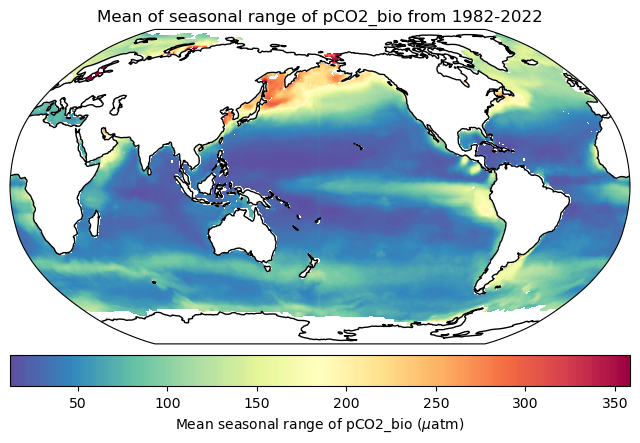

In [21]:
# Mean annual range of pCO2_bio estimated as the mean of the annual max-min ranges

import cartopy.crs as ccrs
from matplotlib.colors import TwoSlopeNorm
plt.figure(figsize=(8, 5))
X = np.squeeze(ds_dict['x'])
Y = np.squeeze(ds_dict['y'])
Z = ds_dict["pco2_bio_range_mean"].copy()
vmin = np.nanpercentile(Z,.1)
vmax = np.nanpercentile(Z,99.9)
Z[Z<vmin] = vmin
Z[Z>vmax] = vmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
plt.title('Mean of seasonal range of pCO2_bio from 1982-2022')

if vmin<0 and vmax>0:
    vcenter = 0.0
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    plt.contourf(X,Y,Z,cmap='Spectral_r',levels=256,transform=ccrs.PlateCarree(), norm=norm);
    # plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree(), norm=norm);
else:
    plt.contourf(X,Y,Z,cmap='Spectral_r',levels=256,transform=ccrs.PlateCarree());
    # plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());

plt.colorbar(orientation="horizontal", pad=0.03,label=r'Mean seasonal range of pCO2_bio ($\mu$atm)',
             ticks=[0,50,100,150,200,250,300,350]);
plt.savefig('Fig1a_map_pCO2bio_range_mean_v07.png', format='png', dpi=300)
plt.show()

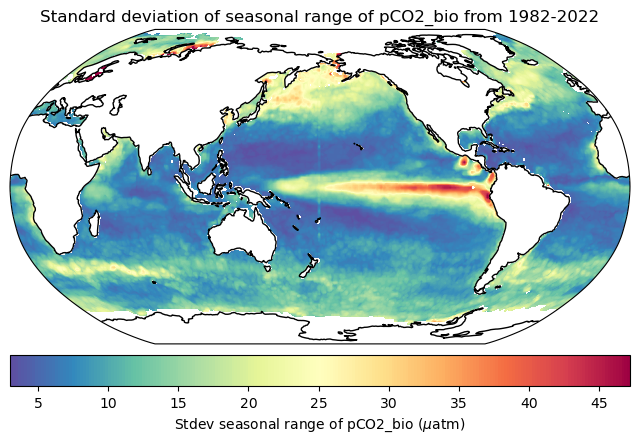

In [22]:
# Standard deviation annual range of pCO2_bio estimated as the mean of the annual max-min ranges

import cartopy.crs as ccrs
from matplotlib.colors import TwoSlopeNorm
plt.figure(figsize=(8, 5))
X = np.squeeze(ds_dict['x'])
Y = np.squeeze(ds_dict['y'])
Z = ds_dict["pco2_bio_range_std"].copy()
vmin = np.nanpercentile(Z,.1)
vmax = np.nanpercentile(Z,99.9)
Z[Z<vmin] = vmin
Z[Z>vmax] = vmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
plt.title('Standard deviation of seasonal range of pCO2_bio from 1982-2022')

if vmin<0 and vmax>0:
    vcenter = 0.0
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    plt.contourf(X,Y,Z,cmap='Spectral_r',levels=256,transform=ccrs.PlateCarree(), norm=norm);
    # plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree(), norm=norm);
else:
    plt.contourf(X,Y,Z,cmap='Spectral_r',levels=256,transform=ccrs.PlateCarree());
    # plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());

plt.colorbar(orientation="horizontal", pad=0.03,label=r'Stdev seasonal range of pCO2_bio ($\mu$atm)',
             ticks=[0,5,10,15,20,25,30,35,40,45]);
plt.savefig('Fig1b_map_pCO2bio_range_stdev_v07.png', format='png', dpi=300)
plt.show()

/tmp/ipykernel_65682/837938566.py:8: RuntimeWarning: Mean of empty slice
  Z = np.nanmean(ds_dict["pco2_bio"],0)


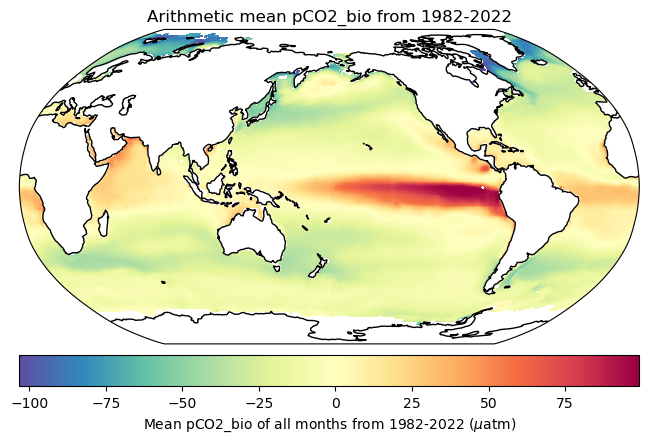

In [23]:
# Arithmetic mean of all monthly values of pCO2_bio from 1982-2022

import cartopy.crs as ccrs
from matplotlib.colors import TwoSlopeNorm
plt.figure(figsize=(8, 5))
X = np.squeeze(ds_dict['x'])
Y = np.squeeze(ds_dict['y'])
Z = np.nanmean(ds_dict["pco2_bio"],0)
vmin = np.nanpercentile(Z,.1)
vmax = np.nanpercentile(Z,99.9)
Z[Z<vmin] = vmin
Z[Z>vmax] = vmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
plt.title('Arithmetic mean pCO2_bio from 1982-2022')

if vmin<0 and vmax>0:
    vcenter = 0.0
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    plt.contourf(X,Y,Z,cmap='Spectral_r',levels=256,transform=ccrs.PlateCarree(), norm=norm);
    # plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree(), norm=norm);
else:
    plt.contourf(X,Y,Z,cmap='Spectral_r',levels=256,transform=ccrs.PlateCarree());
    # plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());

plt.colorbar(orientation="horizontal", pad=0.03,label=r'Mean pCO2_bio of all months from 1982-2022 ($\mu$atm)',
             ticks=[-125,-100,-75,-50,-25,0,25,50,75,100,125,150,175,200]);
plt.savefig('Fig1c_map_pCO2bio_arithmetic_mean_v07.png', format='png', dpi=300)
plt.show()

# Maps of results of the sine-regressions for pCO2_bio

**Maps of the sine-regression mean parameter, amplitude, RMSE, r-squared, and p-values of pCO2_bio**

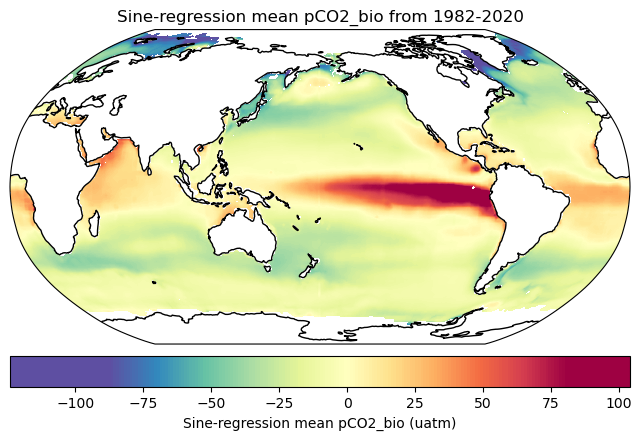

In [24]:
# map of the sine-regression mean values of pCO2_bio
import cartopy.crs as ccrs
from matplotlib.colors import TwoSlopeNorm
plt.figure(figsize=(8, 5))
X = ds_dict['x']
Y = ds_dict['y']
# Z = np.abs(ds_dict["pco2_bio_1982_2022_fass_mean"])
Z = ds_dict["pco2_bio_1982_2022_mean"]
# zmin = np.nanpercentile(Z,1)
# zmax = np.nanpercentile(Z,99)
# Define the zero point
vmin = np.nanpercentile(Z,1)
vmax = np.nanpercentile(Z,99)
vcenter = 0.0
# Create a normalization instance
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title(r'Sine-regression mean pCO2_bio from 1982-2020')
# plt.contourf(X,Y,Z,cmap='plasma',levels=256,vmin=zmin,vmax=zmax,transform=ccrs.PlateCarree());
plt.contourf(X,Y,Z,cmap='Spectral_r',levels=256,transform=ccrs.PlateCarree(), norm=norm);
plt.colorbar(orientation="horizontal", pad=0.03,label='Sine-regression mean pCO2_bio (uatm)',
             ticks=[-125,-100,-75,-50,-25,0,25,50,75,100,125,150,175,200]);
plt.savefig('Fig2a_map_sinefit_pCO2_bio_mean_robinson_v07.png', format='png', dpi=300)
plt.show()

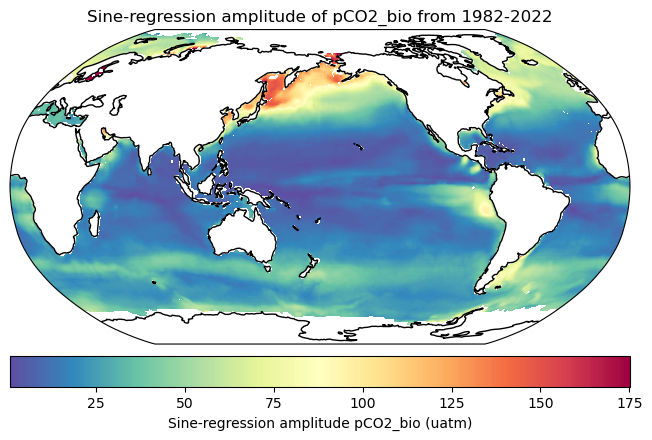

In [25]:
# map of sine-regression amplitude values of pCO2_bio
import cartopy.crs as ccrs
plt.figure(figsize=(8, 5))
X = ds_dict['x']
Y = ds_dict['y']
Z = np.abs(ds_dict["pco2_bio_1982_2022_amplitude"]).copy()
# cosmetic trim of the extreme tails of Z for better color contrast in the map plot
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title(r'Sine-regression amplitude of pCO2_bio from 1982-2022')
# plt.contourf(X,Y,Z,cmap='turbo',levels=256,vmin=zmin,vmax=zmax,transform=ccrs.PlateCarree());
plt.contourf(X,Y,Z,cmap='Spectral_r',levels=256,transform=ccrs.PlateCarree());
plt.colorbar(orientation="horizontal", pad=0.03,label='Sine-regression amplitude pCO2_bio (uatm)',ticks=[0,25,50,75,100,125,150,175,200]);
plt.savefig('Fig2b_map_sinefit_pCO2_bio_amplitude_v07.png', format='png', dpi=300)
plt.show()

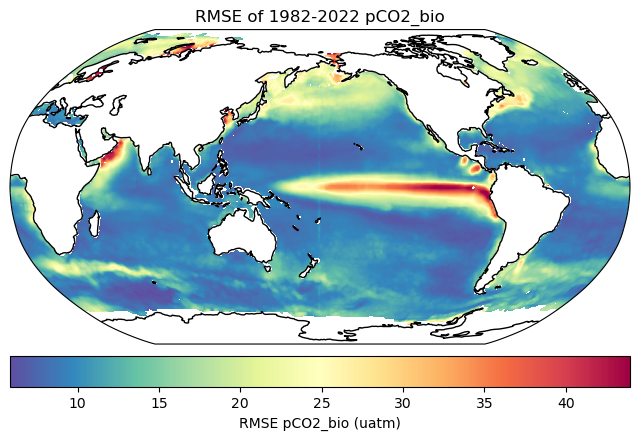

In [26]:
# map of the sine-regression RMSE values of pCO2_bio
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator
plt.figure(figsize=(8, 5))
X = ds_dict['x']
Y = ds_dict['y']
Z = np.abs(ds_dict["pco2_bio_1982_2022_rmse"]).copy()
# cosmetic trim of the extreme tails of Z for better color contrast in the map plot
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title(r'RMSE of 1982-2022 pCO2_bio')
# plt.contourf(X,Y,Z,cmap='plasma',levels=256,vmin=zmin,vmax=zmax,transform=ccrs.PlateCarree());
plt.contourf(X,Y,Z,cmap='Spectral_r',levels=256,transform=ccrs.PlateCarree());
plt.colorbar(orientation="horizontal", pad=0.03,label='RMSE pCO2_bio (uatm)',ticks=[5,10,15,20,25,30,35,40,45,50]);
plt.savefig('Fig2c_map_sinefit_pCO2_bio_RMSE_v07.png', format='png', dpi=300)
plt.show()

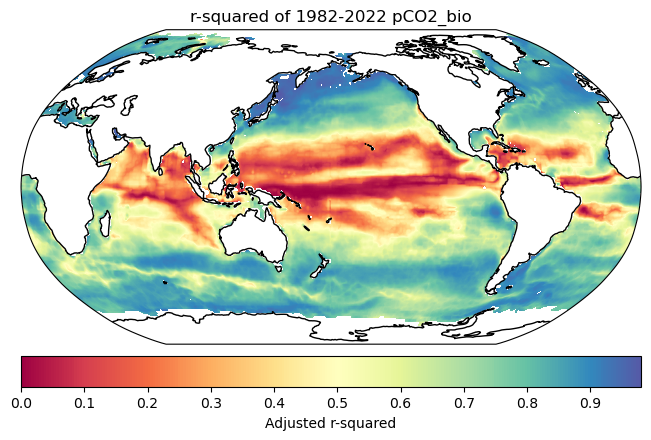

In [27]:
# map of the sine-regression rsquared values of pCO2_bio
from matplotlib.colors import TwoSlopeNorm
plt.figure(figsize=(8, 5))
X = ds_dict['x']
Y = ds_dict['y']
Z = np.abs(ds_dict['pco2_bio_1982_2022_adj_rsquared'])
# Define the zero point
vmin = 0
vmax = 1.0
vcenter = 0.5
# Create a normalization instance
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title(r'r-squared of 1982-2022 pCO2_bio')
plt.contourf(X,Y,Z,cmap='Spectral',transform=ccrs.PlateCarree(), norm=norm,levels=256);
# plt.contourf(X,Y,Z,cmap='plasma',levels=256,transform=ccrs.PlateCarree());
plt.colorbar(orientation="horizontal", pad=0.03,label='Adjusted r-squared',ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]);
plt.savefig('Fig2d_map_sinefit_pCO2_bio_rsquared_v07.png', format='png', dpi=300)
plt.show()

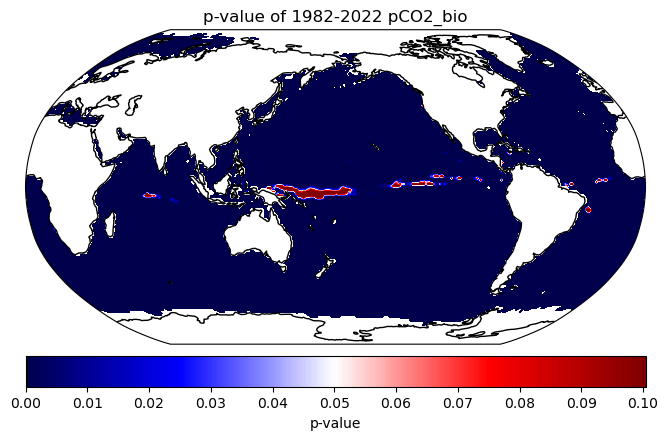

In [28]:
# Robinson map of the sine-regression rsquared values of pCO2_bio
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import LinearLocator
plt.figure(figsize=(8, 5))
X = ds_dict['x']
Y = ds_dict['y']
Z = np.abs(ds_dict['pco2_bio_1982_2022_pvalue'])
Z[Z>0.1]=0.1
# Define the zero point
vmin = 0
vmax = 0.1
vcenter = 0.05
# Create a normalization instance
norm = TwoSlopeNorm(vmin=vmin,vcenter=vcenter,vmax=vmax)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title(r'p-value of 1982-2022 pCO2_bio')
plt.contourf(X,Y,Z,cmap='seismic',transform=ccrs.PlateCarree(),norm=norm,levels=256);
cbar = plt.colorbar(orientation="horizontal", pad=0.03,label='p-value',ticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 
                                                                              0.06, 0.07, 0.08, 0.09, 0.1]);
# Set the number of ticks using LinearLocator
# cbar.locator = LinearLocator(numticks=9)
# cbar.update_ticks()
plt.savefig('Fig2e_map_sinefit_pCO2_bio_pvalue_v07.png', format='png', dpi=300)
plt.show()

# Time series at three locations in the coastal California Current Ecosystem:

- Columbia River
- San Francisco
- Huntington

Panel a shows the time-series of pCO2_NT and pCO2_atm. Panel b shows that the annually recurring seasonal cycle of pCO2_bio is well represented by the sine-regression fit near the Columbia River and Huntington, and less well near San Francisco.

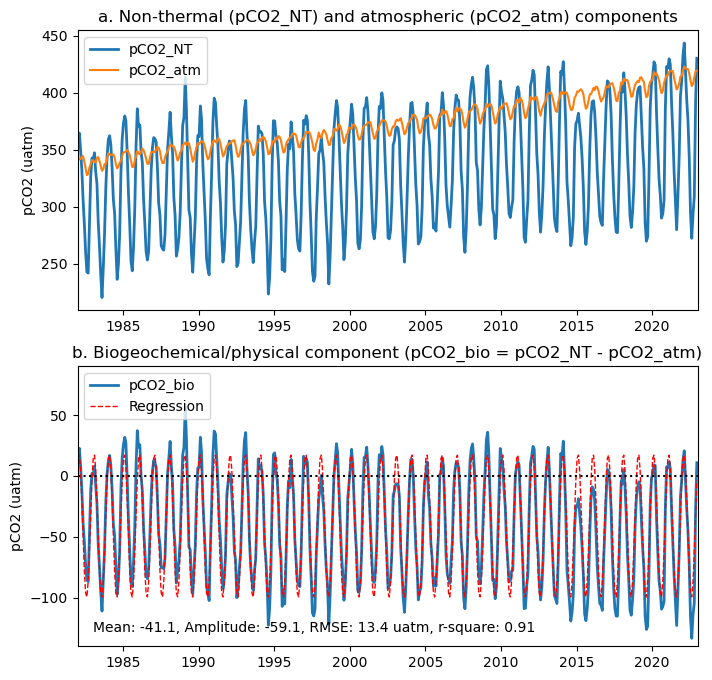

In [29]:
# Columbia River location i,j coordinates
i=234
j=136
fig, ax = plt.subplot_mosaic(
    '''
    A
    B
    ''',
    figsize = (8, 8)
)
# - - -
# Plot at ['A']
ax['A'].plot(np.squeeze(ds_dict["yearfrac"]), np.squeeze(ds_dict["pco2_NT"][:,j,i]), label='pCO2_NT', linestyle='-', marker='', linewidth=2)
ax['A'].plot(np.squeeze(ds_dict["yearfrac"]), np.squeeze(ds_dict["pco2_atm"][:,j,i]), label='pCO2_atm', linestyle='-', marker='')
ax['A'].set_ylabel('pCO2 (uatm)')
ax['A'].legend(loc='upper left')
ax['A'].set_title('a. Non-thermal (pCO2_NT) and atmospheric (pCO2_atm) components')
ax['A'].set_xlim(1982, 2023)
# - - -
# Plot at ['B']
ax['B'].plot(np.squeeze(ds_dict["yearfrac"]), np.squeeze(ds_dict["pco2_bio"][:,j,i]), label='pCO2_bio', linestyle='-', marker='', linewidth=2)
ax['B'].plot(np.squeeze(ds_dict['yearfrac']), np.squeeze(ds_dict["pco2_bio_1982_2022_fit"][:,j,i]), label='Regression', color="red", linestyle='--', marker='', linewidth=1)
ax['B'].set_ylabel('pCO2 (uatm)')
ax['B'].legend(loc='upper left')
ax['B'].set_title('b. Biogeochemical/physical component (pCO2_bio = pCO2_NT - pCO2_atm)')
ax['B'].set_xlim(1982, 2023)
str_mean = f"{ds_dict["pco2_bio_1982_2022_mean"][j,i]:.1f}"
str_amp = f"{ds_dict["pco2_bio_1982_2022_amplitude"][j,i]:.1f}"
str_rmse = f"{ds_dict["pco2_bio_1982_2022_rmse"][j,i]:.1f}"
str_rsq = f"{ds_dict["pco2_bio_1982_2022_adj_rsquared"][j,i]:.2f}"
ax['B'].text(1983, -125, 'Mean: '+str_mean+', Amplitude: '+str_amp+', RMSE: '+str_rmse+' uatm'+', r-square: '+str_rsq,
        fontsize=10, color='black', ha='left', va='center')
ax['B'].axhline(y=0, color='k', linestyle=':')
ax['B'].set_ylim(-140, 90)
# - - -
fig.savefig('Fig3a_pco2_NT_bio_at_ColumbiaRiver_1982-2022_v07.png', format='png', dpi=300);

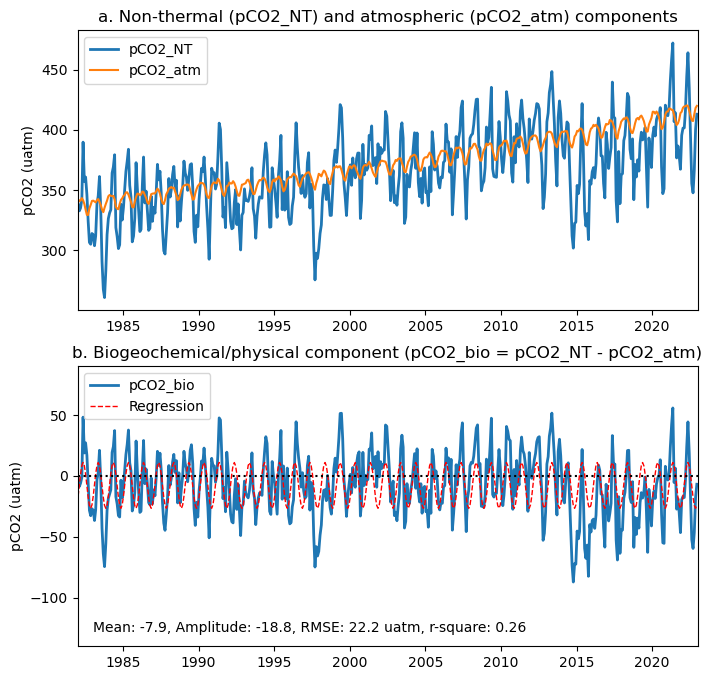

In [30]:
# San Francisco location i,j coordinates
i=236
j=127
fig, ax = plt.subplot_mosaic(
    '''
    A
    B
    ''',
    figsize = (8, 8)
)
# - - -
# Plot at ['A']
ax['A'].plot(np.squeeze(ds_dict["yearfrac"]), np.squeeze(ds_dict["pco2_NT"][:,j,i]), label='pCO2_NT', linestyle='-', marker='', linewidth=2)
ax['A'].plot(np.squeeze(ds_dict["yearfrac"]), np.squeeze(ds_dict["pco2_atm"][:,j,i]), label='pCO2_atm', linestyle='-', marker='')
ax['A'].set_ylabel('pCO2 (uatm)')
ax['A'].legend(loc='upper left')
ax['A'].set_title('a. Non-thermal (pCO2_NT) and atmospheric (pCO2_atm) components')
ax['A'].set_xlim(1982, 2023)
# - - -
# Plot at ['B']
ax['B'].plot(np.squeeze(ds_dict["yearfrac"]), np.squeeze(ds_dict["pco2_bio"][:,j,i]), label='pCO2_bio', linestyle='-', marker='', linewidth=2)
ax['B'].plot(np.squeeze(ds_dict['yearfrac']), np.squeeze(ds_dict["pco2_bio_1982_2022_fit"][:,j,i]), label='Regression', color="red", linestyle='--', marker='', linewidth=1)
ax['B'].set_ylabel('pCO2 (uatm)')
ax['B'].legend(loc='upper left')
ax['B'].set_title('b. Biogeochemical/physical component (pCO2_bio = pCO2_NT - pCO2_atm)')
ax['B'].set_xlim(1982, 2023)
str_mean = f"{ds_dict["pco2_bio_1982_2022_mean"][j,i]:.1f}"
str_amp = f"{ds_dict["pco2_bio_1982_2022_amplitude"][j,i]:.1f}"
str_rmse = f"{ds_dict["pco2_bio_1982_2022_rmse"][j,i]:.1f}"
str_rsq = f"{ds_dict["pco2_bio_1982_2022_adj_rsquared"][j,i]:.2f}"
ax['B'].text(1983, -125, 'Mean: '+str_mean+', Amplitude: '+str_amp+', RMSE: '+str_rmse+' uatm'+', r-square: '+str_rsq,
        fontsize=10, color='black', ha='left', va='center')
ax['B'].axhline(y=0, color='k', linestyle=':')
ax['B'].set_ylim(-140, 90)
# - - -
fig.savefig('Fig3b_pco2_NT_bio_at_SanFrancisco_1982-2022_v07.png', format='png', dpi=300);

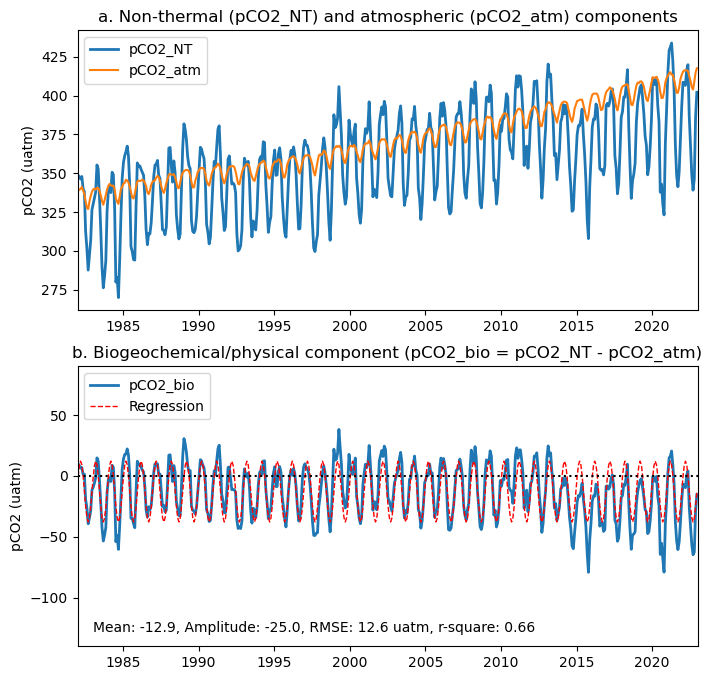

In [31]:
# Huntington location i,j coordinates
i=241
j=122
fig, ax = plt.subplot_mosaic(
    '''
    A
    B
    ''',
    figsize = (8, 8)
)
# - - -
# Plot at ['A']
ax['A'].plot(np.squeeze(ds_dict["yearfrac"]), np.squeeze(ds_dict["pco2_NT"][:,j,i]), label='pCO2_NT', linestyle='-', marker='', linewidth=2)
ax['A'].plot(np.squeeze(ds_dict["yearfrac"]), np.squeeze(ds_dict["pco2_atm"][:,j,i]), label='pCO2_atm', linestyle='-', marker='')
ax['A'].set_ylabel('pCO2 (uatm)')
ax['A'].legend(loc='upper left')
ax['A'].set_title('a. Non-thermal (pCO2_NT) and atmospheric (pCO2_atm) components')
ax['A'].set_xlim(1982, 2023)
# - - -
# Plot at ['B']
ax['B'].plot(np.squeeze(ds_dict["yearfrac"]), np.squeeze(ds_dict["pco2_bio"][:,j,i]), label='pCO2_bio', linestyle='-', marker='', linewidth=2)
ax['B'].plot(np.squeeze(ds_dict['yearfrac']), np.squeeze(ds_dict["pco2_bio_1982_2022_fit"][:,j,i]), label='Regression', color="red", linestyle='--', marker='', linewidth=1)
ax['B'].set_ylabel('pCO2 (uatm)')
ax['B'].legend(loc='upper left')
ax['B'].set_title('b. Biogeochemical/physical component (pCO2_bio = pCO2_NT - pCO2_atm)')
ax['B'].set_xlim(1982, 2023)
str_mean = f"{ds_dict["pco2_bio_1982_2022_mean"][j,i]:.1f}"
str_amp = f"{ds_dict["pco2_bio_1982_2022_amplitude"][j,i]:.1f}"
str_rmse = f"{ds_dict["pco2_bio_1982_2022_rmse"][j,i]:.1f}"
str_rsq = f"{ds_dict["pco2_bio_1982_2022_adj_rsquared"][j,i]:.2f}"
ax['B'].text(1983, -125, 'Mean: '+str_mean+', Amplitude: '+str_amp+', RMSE: '+str_rmse+' uatm'+', r-square: '+str_rsq,
        fontsize=10, color='black', ha='left', va='center')
ax['B'].axhline(y=0, color='k', linestyle=':')
ax['B'].set_ylim(-140, 90)
# - - -
fig.savefig('Fig3b_pco2_NT_bio_at_Huntington_1982-2022_v07.png', format='png', dpi=300);